# **🎬 Scene Preprocessing**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import cv2
import numpy as np
import matplotlib.pyplot as plt

from lumivid.utils.video_utils import get_video, get_frame_mask, get_frame_from_video
from lumivid.preprocessing.scene_preprocessing import mask_reframe_frame, preprocess_frame

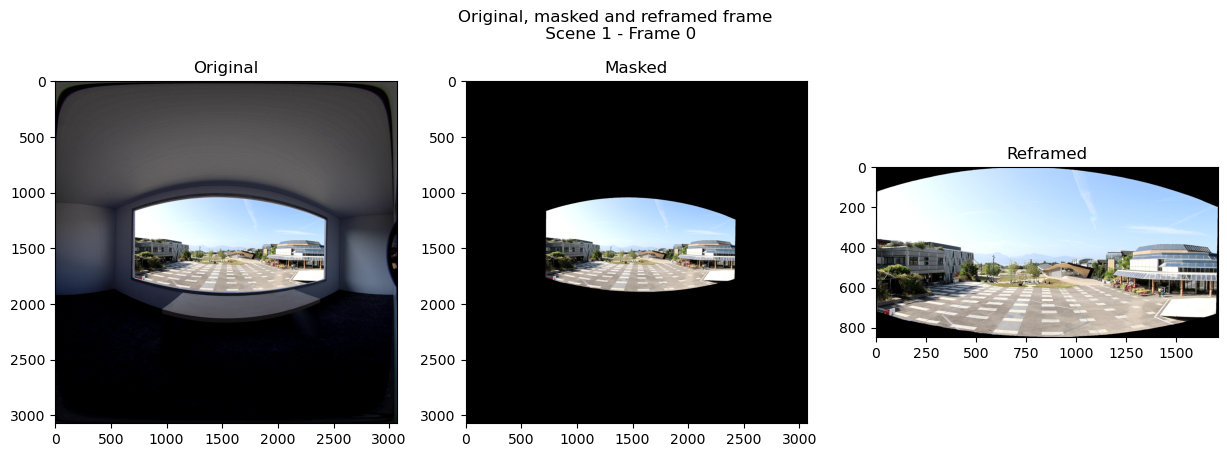

In [3]:
# Get frame from video
scene_path = '../data/preprocessing/raw_scenes/Scene01.mp4'
video = get_video(scene_path)
left_frame, _ = get_frame_from_video(video, 0, masked=False, reframe=False)
left_frame_masked, _ = get_frame_from_video(video, 0, masked=True, reframe=False)
left_frame_reframed, _ = get_frame_from_video(video, 0, masked=True, reframe=True)

# BGR to RGB
left_frame = cv2.cvtColor(left_frame, cv2.COLOR_BGR2RGB)
left_frame_masked = cv2.cvtColor(left_frame_masked, cv2.COLOR_BGR2RGB)
left_frame_reframed = cv2.cvtColor(left_frame_reframed, cv2.COLOR_BGR2RGB)

# Plot
plt.figure(figsize=(15, 5))
plt.suptitle('Original, masked and reframed frame \n Scene 1 - Frame 0')
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(left_frame)
plt.subplot(1, 3, 2)
plt.title('Masked')
plt.imshow(left_frame_masked)
plt.subplot(1, 3, 3)
plt.title('Reframed')
plt.imshow(left_frame_reframed)
plt.show()

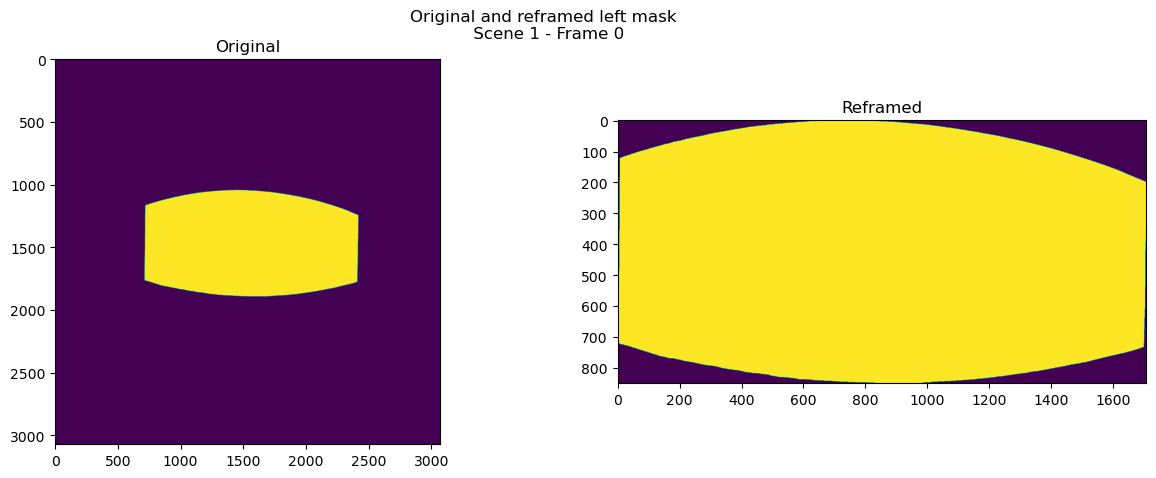

In [4]:
# Get original and reframed mask
mask = get_frame_mask('left', reframe=False)
mask_reframed = get_frame_mask('left', reframe=True)

# Plot
plt.figure(figsize=(15, 5))
plt.suptitle('Original and reframed left mask \n Scene 1 - Frame 0')
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(mask)
plt.subplot(1, 2, 2)
plt.title('Reframed')
plt.imshow(mask_reframed)
plt.show()

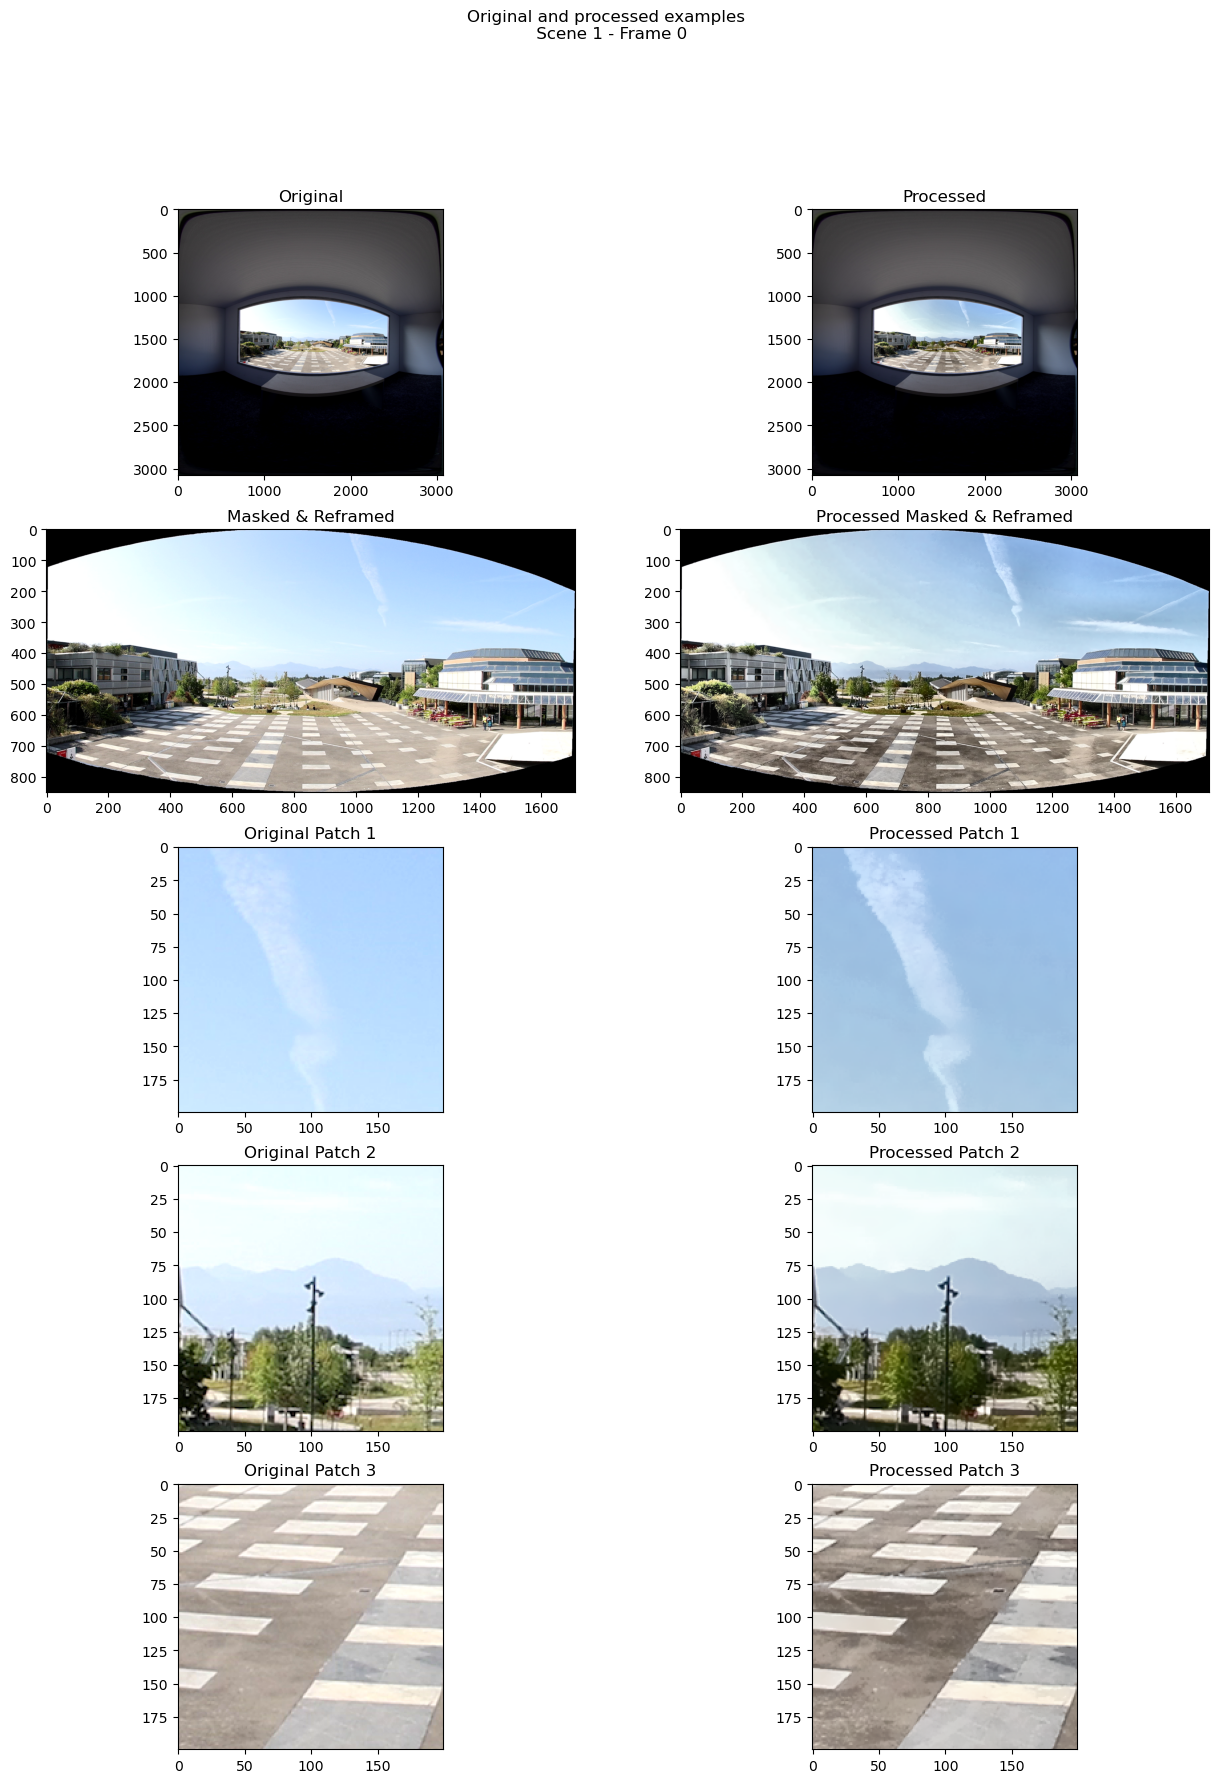

In [5]:
def preprocess_frame_from_video(
        input_video_path: str, 
        frame_idx: int, 
        mask_reframe: bool = False
    ) -> np.ndarray:
    """
    Processes the frame at the given index from the given video.

    Args:
        input_video_path (str): Path to the input video.
        frame_idx (int): Index of the frame to be processed.
        mask_reframe (bool): Whether to reframe the frame after masking.

    Returns:
        preprocessed_frame (np.ndarray): Preprocessed frame.
    """

    input_video = get_video(input_video_path)
    assert frame_idx >= 0 and frame_idx < input_video.get(cv2.CAP_PROP_FRAME_COUNT), f"❌ Invalid frame index {frame_idx}: video has {int(input_video.get(cv2.CAP_PROP_FRAME_COUNT))} frames."

    # Get frame
    input_video.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    _, frame = input_video.read()
    input_video.release()

    # Process frame
    left_frame, _ = frame[:, :frame.shape[1]//2], frame[:, frame.shape[1]//2:]
    if mask_reframe:
        left_frame = mask_reframe_frame(left_frame, 'left')
    mask = get_frame_mask('left', reframe=mask_reframe)
    preprocessed_frame = preprocess_frame(left_frame, mask=mask)

    return preprocessed_frame.astype(np.uint8)

# Get frames from video
raw_frame, _ = get_frame_from_video(video, 0, masked=False, reframe=False)
raw_mr_frame, _ = get_frame_from_video(video, 0, masked=True, reframe=True)

# Preprocess frames
processed_frame = preprocess_frame_from_video(scene_path, 0, mask_reframe=False)
processed_mr_frame = preprocess_frame_from_video(scene_path, 0, mask_reframe=True)

# Get patches for focused comparison
patch1_size = 200
patch1_x,patch1_y = 1700,1150
raw_patch1_frame = raw_frame[patch1_y:patch1_y+patch1_size, patch1_x:patch1_x+patch1_size]
processed_patch1_frame = processed_frame[patch1_y:patch1_y+patch1_size, patch1_x:patch1_x+patch1_size]

patch2_size = 200
patch2_x,patch2_y = 1200,1400
raw_patch2_frame = raw_frame[patch2_y:patch2_y+patch2_size, patch2_x:patch2_x+patch2_size]
processed_patch2_frame = processed_frame[patch2_y:patch2_y+patch2_size, patch2_x:patch2_x+patch2_size]

patch3_size = 200
patch3_x,patch3_y = 1250,1650
raw_patch3_frame = raw_frame[patch3_y:patch3_y+patch3_size, patch3_x:patch3_x+patch3_size]
processed_patch3_frame = processed_frame[patch3_y:patch3_y+patch3_size, patch3_x:patch3_x+patch3_size]

# BGR to RGB
raw_frame = cv2.cvtColor(raw_frame, cv2.COLOR_BGR2RGB)
raw_mr_frame = cv2.cvtColor(raw_mr_frame, cv2.COLOR_BGR2RGB)
processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)
processed_mr_frame = cv2.cvtColor(processed_mr_frame, cv2.COLOR_BGR2RGB)
raw_patch1_frame = cv2.cvtColor(raw_patch1_frame, cv2.COLOR_BGR2RGB)
processed_patch1_frame = cv2.cvtColor(processed_patch1_frame, cv2.COLOR_BGR2RGB)
raw_patch2_frame = cv2.cvtColor(raw_patch2_frame, cv2.COLOR_BGR2RGB)
processed_patch2_frame = cv2.cvtColor(processed_patch2_frame, cv2.COLOR_BGR2RGB)
raw_patch3_frame = cv2.cvtColor(raw_patch3_frame, cv2.COLOR_BGR2RGB)
processed_patch3_frame = cv2.cvtColor(processed_patch3_frame, cv2.COLOR_BGR2RGB)

# Plot
plt.figure(figsize=(15, 20))
plt.suptitle('Original and processed examples \n Scene 1 - Frame 0')
plt.subplot(5, 2, 1)
plt.title('Original')
plt.imshow(raw_frame)
plt.subplot(5, 2, 2)
plt.title('Processed')
plt.imshow(processed_frame)
plt.subplot(5, 2, 3)
plt.title('Masked & Reframed')
plt.imshow(raw_mr_frame)
plt.subplot(5, 2, 4)
plt.title('Processed Masked & Reframed')
plt.imshow(processed_mr_frame)
plt.subplot(5, 2, 5)
plt.title('Original Patch 1')
plt.imshow(raw_patch1_frame)
plt.subplot(5, 2, 6)
plt.title('Processed Patch 1')
plt.imshow(processed_patch1_frame)
plt.subplot(5, 2, 7)
plt.title('Original Patch 2')
plt.imshow(raw_patch2_frame)
plt.subplot(5, 2, 8)
plt.title('Processed Patch 2')
plt.imshow(processed_patch2_frame)
plt.subplot(5, 2, 9)
plt.title('Original Patch 3')
plt.imshow(raw_patch3_frame)
plt.subplot(5, 2, 10)
plt.title('Processed Patch 3')
plt.imshow(processed_patch3_frame)
plt.show()